,Unnamed: 0,bucket,cpu,gcl,population,gcl delta,cpu abnormal,cpu avg
count,1206.00000,1206.000000,1206.000000,1.206000e+03,1206.000000,1205.000000,57.000000,1107.000000
mean,602.50000,9825.221393,16.446895,8.497005e+06,11.538143,10.212448,195.237328,16.465259
std,348.28652,221.107596,41.762731,3.525964e+03,0.788794,6.556907,51.798517,1.077350
min,0.00000,9398.000000,3.326286,8.491492e+06,9.000000,0.000000,54.863687,11.686171
25%,301.25000,9650.250000,4.851875,8.494301e+06,11.000000,6.000000,205.289220,15.682257
50%,602.50000,9858.000000,5.483413,8.496430e+06,12.000000,9.000000,211.256448,16.173681
75%,903.75000,10000.000000,8.080026,8.499949e+06,12.000000,15.000000,224.548701,17.120222
max,1205.00000,11000.000000,237.018481,8.503798e+06,12.000000,24.000000,237.018481,20.591582


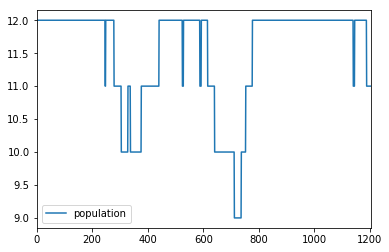

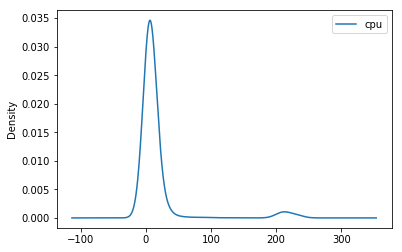

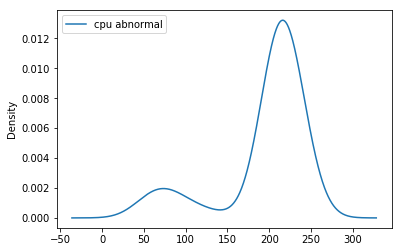

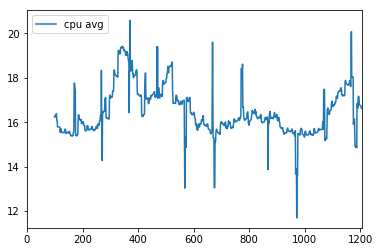

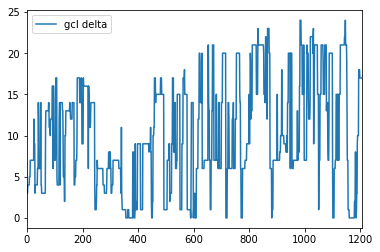

In [2]:
import fetch_stats as fs
import pandas as pd
import matplotlib.pyplot as plt

REFRESH_DATA = 0

if REFRESH_DATA:
    reports = fs.main()
    reports = [
        {
            **x,
            'gcl': x['gcl']['progress']
        }
        for x in reports
    ]
    df = pd.DataFrame(reports)
    df.to_csv("reports.csv")
else:
    df = pd.read_csv("reports.csv")
    
df['gcl delta'] = df['gcl'].diff().shift(-1)
df['cpu abnormal'] = df[df['cpu'] > 50]["cpu"]
df['cpu avg'] = df['cpu'].rolling(100).sum() / 100

df.plot(y="population")
df.plot.density(y="cpu")
df.plot.density(y="cpu abnormal")
df.plot(y="cpu avg")
df.plot(y="gcl delta")
df.describe()